In [75]:
# Import necessary libraries
import pandas as pd

# Load the dataset
file_path = 'used_vehicles.csv'  
car_data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
print("First 5 rows of the dataset:")
print(car_data.head())

First 5 rows of the dataset:
            Make                            Model    Price  Year  Kilometer  \
0          Honda              Amaze 1.2 VX i-VTEC   505000  2017      87150   
1  Maruti Suzuki                  Swift DZire VDI   450000  2014      75000   
2        Hyundai             i10 Magna 1.2 Kappa2   220000  2011      67000   
3         Toyota                         Glanza G   799000  2019      37500   
4         Toyota  Innova 2.4 VX 7 STR [2016-2020]  1950000  2018      69000   

  Fuel Type Transmission   Location   Color   Owner Seller Type   Engine  \
0    Petrol       Manual       Pune    Grey   First   Corporate  1198 cc   
1    Diesel       Manual   Ludhiana   White  Second  Individual  1248 cc   
2    Petrol       Manual    Lucknow  Maroon   First  Individual  1197 cc   
3    Petrol       Manual  Mangalore     Red   First  Individual  1197 cc   
4    Diesel       Manual     Mumbai    Grey   First  Individual  2393 cc   

            Max Power              Max 

In [79]:

# Check the basic info of the dataset (columns, data types, and non-null values)
print("\nDataset Info:")
print(car_data.info())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              1979 non-null   object 
 12  Max Power           1979 non-null   object 
 13  Max Torque          1979 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length              1995 non-null   floa

In [81]:

# Check for missing values in the dataset
print("\nMissing Values:")
print(car_data.isnull().sum())



Missing Values:
Make                    0
Model                   0
Price                   0
Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller Type             0
Engine                 80
Max Power              80
Max Torque             80
Drivetrain            136
Length                 64
Width                  64
Height                 64
Seating Capacity       64
Fuel Tank Capacity    113
dtype: int64


In [83]:

# Summary statistics of numerical columns
print("\nSummary Statistics:")
print(car_data.describe())


Summary Statistics:
              Price         Year     Kilometer       Length        Width  \
count  2.059000e+03  2059.000000  2.059000e+03  1995.000000  1995.000000   
mean   1.702992e+06  2016.425449  5.422471e+04  4280.860652  1767.991980   
std    2.419881e+06     3.363564  5.736172e+04   442.458507   135.265825   
min    4.900000e+04  1988.000000  0.000000e+00  3099.000000  1475.000000   
25%    4.849990e+05  2014.000000  2.900000e+04  3985.000000  1695.000000   
50%    8.250000e+05  2017.000000  5.000000e+04  4370.000000  1770.000000   
75%    1.925000e+06  2019.000000  7.200000e+04  4629.000000  1831.500000   
max    3.500000e+07  2022.000000  2.000000e+06  5569.000000  2220.000000   

            Height  Seating Capacity  Fuel Tank Capacity  
count  1995.000000       1995.000000         1946.000000  
mean   1591.735338          5.306266           52.002210  
std     136.073956          0.822170           15.110198  
min    1165.000000          2.000000           15.000000  

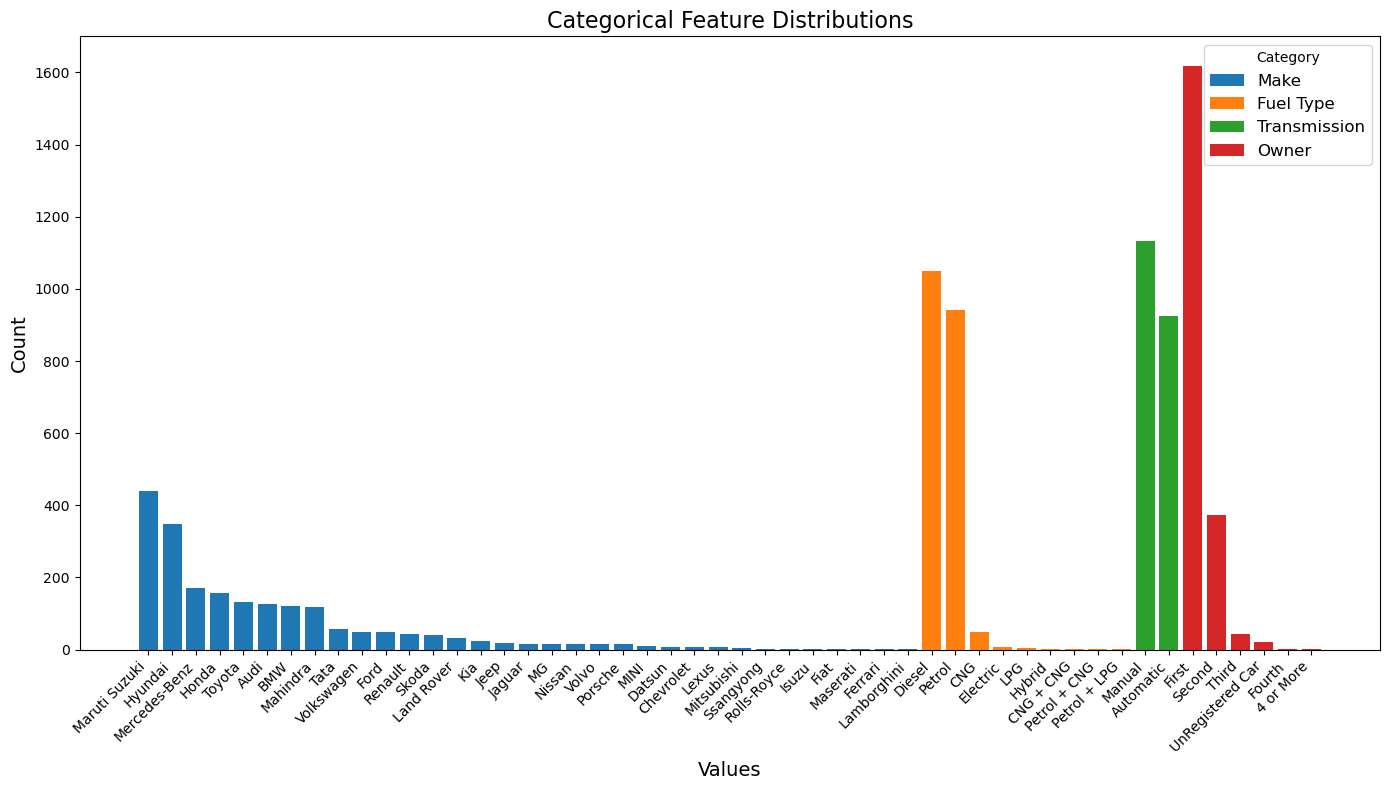

In [93]:
# Step 1: Check unique values in categorical features
import pandas as pd
import matplotlib.pyplot as plt

# Combine value counts for categorical features into a single table
categories = {
    'Make': car_data['Make'].value_counts(),
    'Fuel Type': car_data['Fuel Type'].value_counts(),
    'Transmission': car_data['Transmission'].value_counts(),
    'Owner': car_data['Owner'].value_counts()
}

# Convert to a combined DataFrame
combined_df = pd.concat(categories).reset_index()
combined_df.columns = ['Category', 'Value', 'Count']

# Plot a grouped bar chart
plt.figure(figsize=(14, 8))
for category in combined_df['Category'].unique():
    category_data = combined_df[combined_df['Category'] == category]
    plt.bar(category_data['Value'], category_data['Count'], label=category)

plt.title("Categorical Feature Distributions", fontsize=16)
plt.xlabel("Values", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title="Category", fontsize=12)
plt.tight_layout()
plt.show()



In [89]:
# Step 2: Convert 'Year' to 'Age'
from datetime import datetime

current_year = datetime.now().year
car_data['Age'] = current_year - car_data['Year']
car_data.drop('Year', axis=1, inplace=True)
print("\nAdded 'Age' column. Dropped 'Year'.")



Added 'Age' column. Dropped 'Year'.


In [15]:
# Step 3: Convert 'Engine' and 'Max Power' to numeric

# Ensure columns are strings before extraction
car_data['Engine'] = car_data['Engine'].astype(str).str.extract(r'(\d+)').astype(float)
car_data['Max Power'] = car_data['Max Power'].astype(str).str.extract(r'(\d+)').astype(float)

print("\nConverted 'Engine' and 'Max Power' to numeric.")



Converted 'Engine' and 'Max Power' to numeric.


In [17]:
# Step 4: Handle missing values
print("\nMissing values before handling:")
print(car_data.isnull().sum())

# Fill numerical missing values with median
numerical_cols = ['Engine', 'Max Power']
for column in numerical_cols:
    car_data[column] = car_data[column].fillna(car_data[column].median())

# For categorical missing values (if any), fill with 'Unknown' or mode
categorical_cols = ['Fuel Type', 'Transmission', 'Owner']
for column in categorical_cols:
    car_data[column] = car_data[column].fillna(car_data[column].mode()[0])

print("\nMissing values after handling:")
print(car_data.isnull().sum())



Missing values before handling:
Make                    0
Model                   0
Price                   0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller Type             0
Engine                 80
Max Power              80
Max Torque             80
Drivetrain            136
Length                 64
Width                  64
Height                 64
Seating Capacity       64
Fuel Tank Capacity    113
Age                     0
dtype: int64

Missing values after handling:
Make                    0
Model                   0
Price                   0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller Type             0
Engine                  0
Max Power               0
Max Torque             80
Drivetrain            136
Length                 64
Width       


Numerical Feature Distributions:


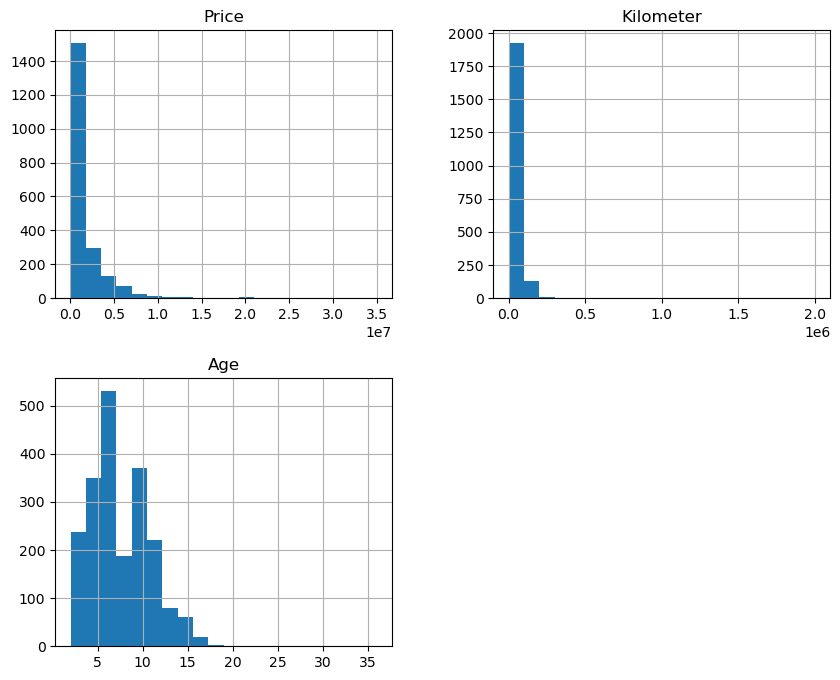

In [21]:
# Step 5: Explore numerical features
import matplotlib.pyplot as plt
print("\nNumerical Feature Distributions:")
car_data[['Price', 'Kilometer', 'Age']].hist(bins=20, figsize=(10, 8))
plt.show()

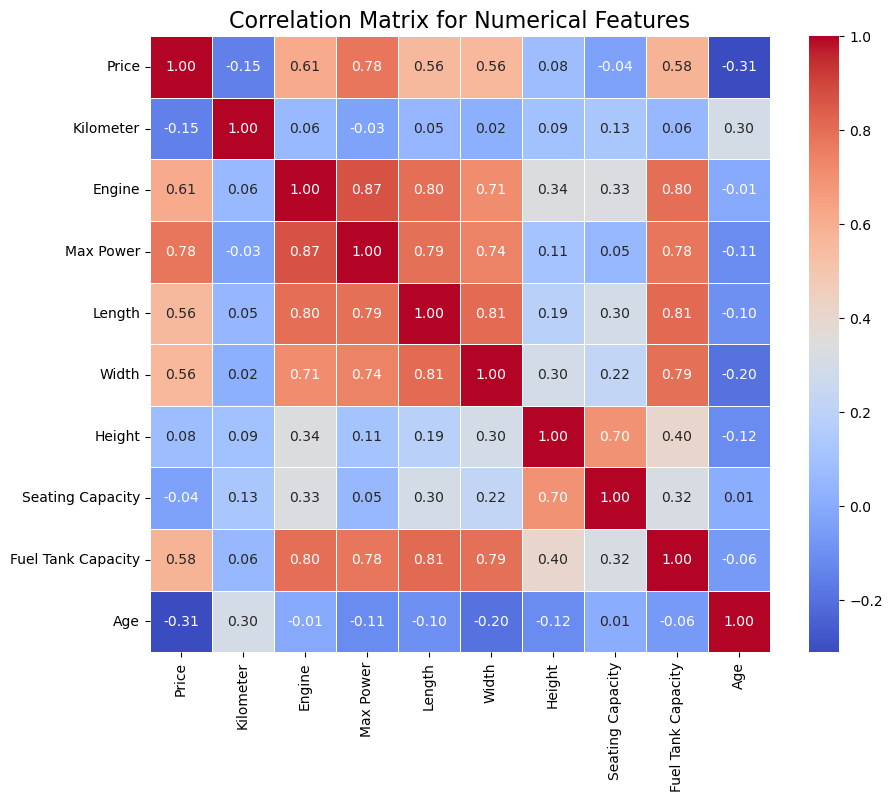

In [23]:
# Step 6: Correlation Analysis

# Select only numerical columns for correlation analysis
numerical_columns = car_data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = car_data[numerical_columns].corr()

# Plot the correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix for Numerical Features", fontsize=16)
plt.show()


In [25]:
# Step 7: Remove less relevant or redundant columns
columns_to_drop = ['Location', 'Color', 'Drivetrain', 'Height', 'Length', 'Width', 'Fuel Tank Capacity']
car_data.drop(columns=columns_to_drop, axis=1, inplace=True)
print(f"\nDropped columns: {columns_to_drop}")


Dropped columns: ['Location', 'Color', 'Drivetrain', 'Height', 'Length', 'Width', 'Fuel Tank Capacity']


In [27]:
# Step 8: Encode categorical features (One-Hot Encoding)
car_data = pd.get_dummies(car_data, columns=['Make', 'Fuel Type', 'Transmission', 'Owner'], drop_first=True)
print("\nPerformed One-Hot Encoding on categorical features.")


Performed One-Hot Encoding on categorical features.


In [29]:
# Step 9: Final cleaned dataset summary
print("\nFinal Dataset Info:")
print(car_data.info())
print("\nFinal Dataset Preview:")
print(car_data.head())



Final Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 55 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Model                   2059 non-null   object 
 1   Price                   2059 non-null   int64  
 2   Kilometer               2059 non-null   int64  
 3   Seller Type             2059 non-null   object 
 4   Engine                  2059 non-null   float64
 5   Max Power               2059 non-null   float64
 6   Max Torque              1979 non-null   object 
 7   Seating Capacity        1995 non-null   float64
 8   Age                     2059 non-null   int64  
 9   Make_BMW                2059 non-null   bool   
 10  Make_Chevrolet          2059 non-null   bool   
 11  Make_Datsun             2059 non-null   bool   
 12  Make_Ferrari            2059 non-null   bool   
 13  Make_Fiat               2059 non-null   bool   
 14  Make_Ford          

In [31]:
# Step 10: Save the cleaned dataset
cleaned_file_path = 'cleaned_used_vehicles.csv'
car_data.to_csv(cleaned_file_path, index=False)
print(f"\nCleaned dataset saved to {cleaned_file_path}")


Cleaned dataset saved to cleaned_used_vehicles.csv


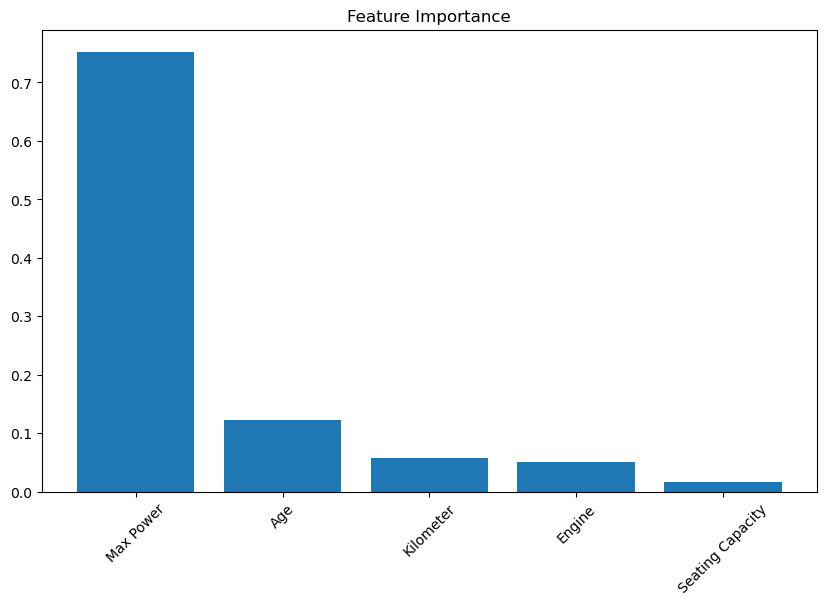

In [35]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np


# Prepare data for feature importance analysis
X = car_data.drop(['Price'], axis=1).select_dtypes(include=['float64', 'int64'])
y = car_data['Price']

# Train a Random Forest model
model = RandomForestRegressor(random_state=42)
model.fit(X, y)

# Plot feature importance
importances = model.feature_importances_
feature_names = X.columns
sorted_indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(len(importances)), importances[sorted_indices], align="center")
plt.xticks(range(len(importances)), feature_names[sorted_indices], rotation=45)
plt.show()


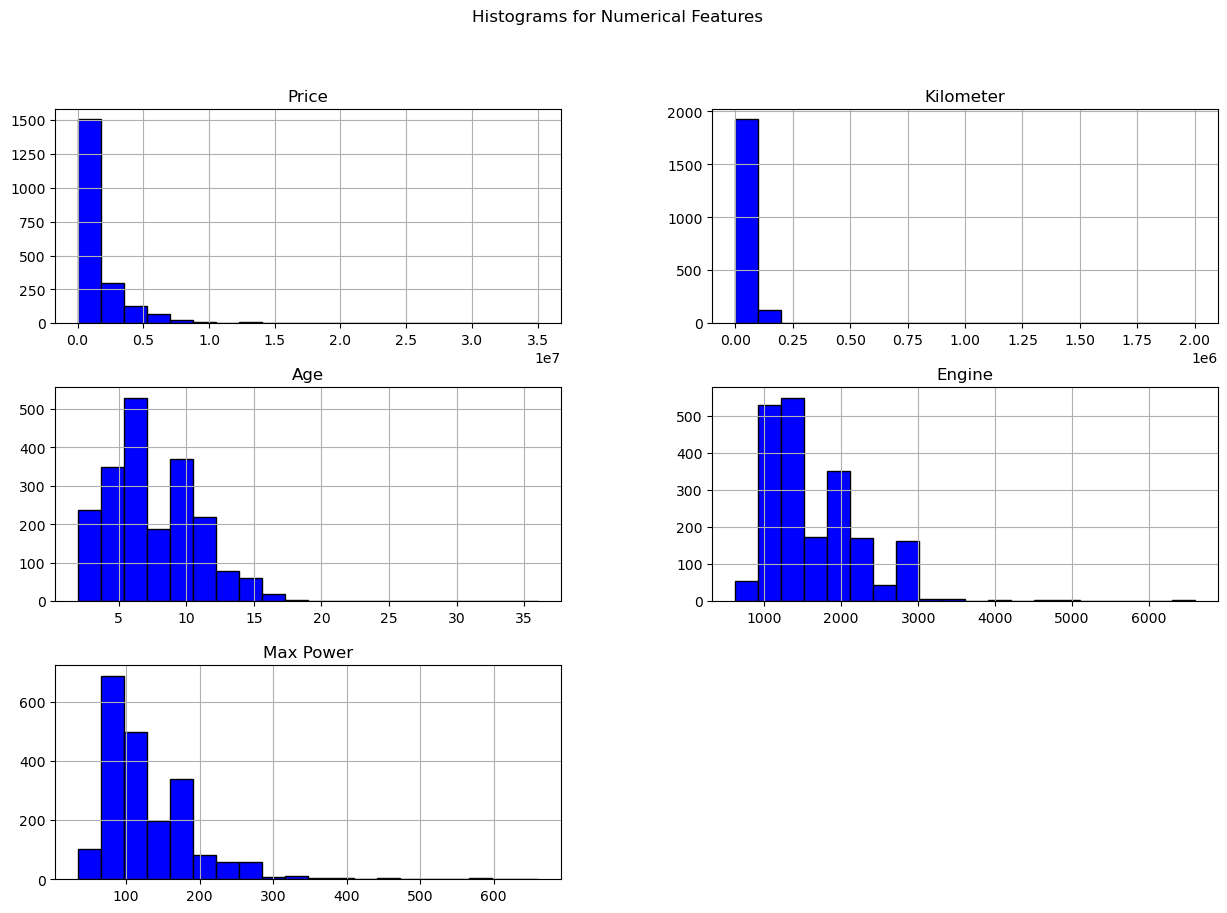

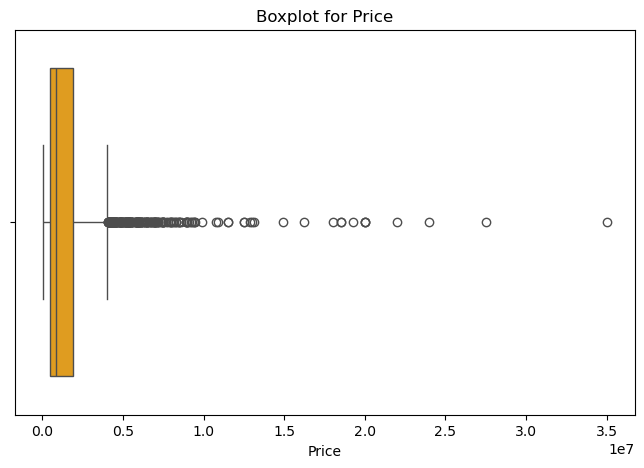

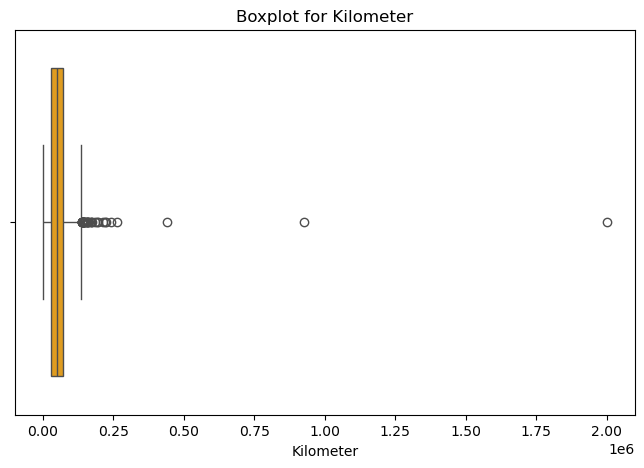

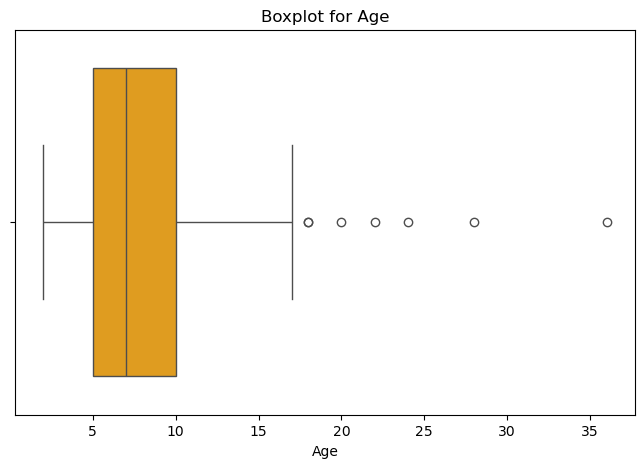

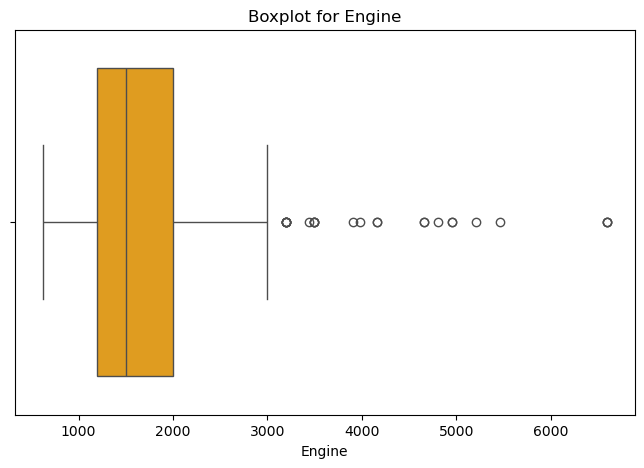

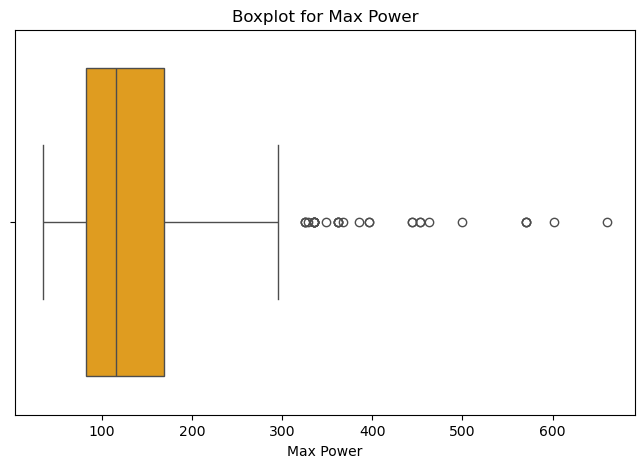

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for numerical features
numerical_features = ['Price', 'Kilometer', 'Age', 'Engine', 'Max Power']
car_data[numerical_features].hist(bins=20, figsize=(15, 10), color='blue', edgecolor='black')
plt.suptitle("Histograms for Numerical Features")
plt.show()

# Boxplots to identify outliers in numerical features
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=car_data[feature], color='orange')
    plt.title(f"Boxplot for {feature}")
    plt.show()


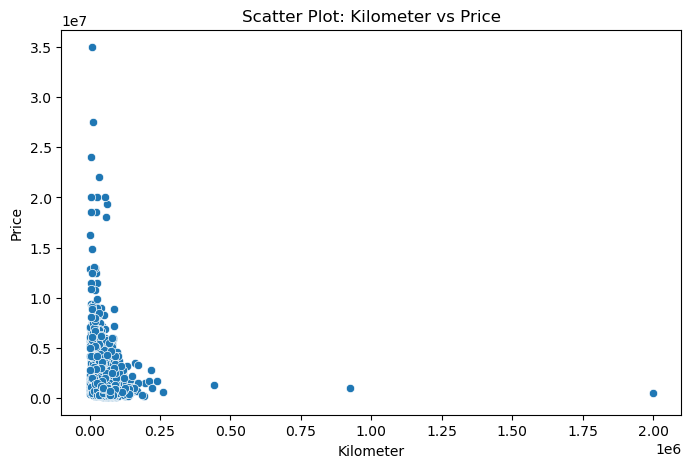

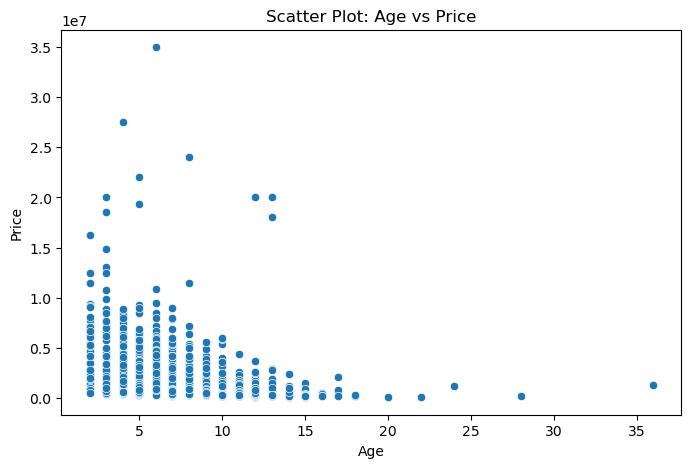

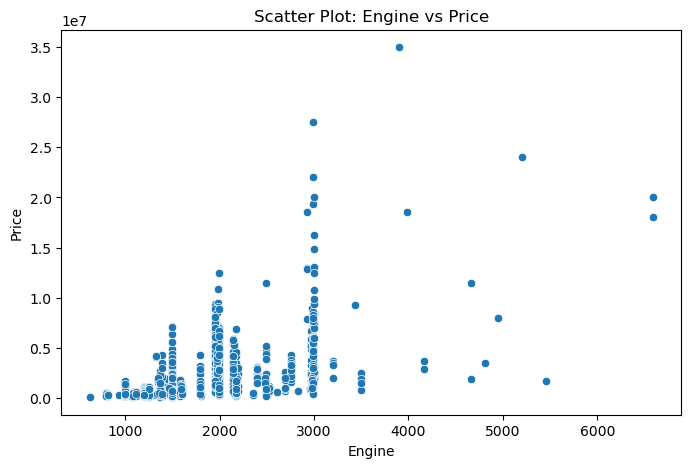

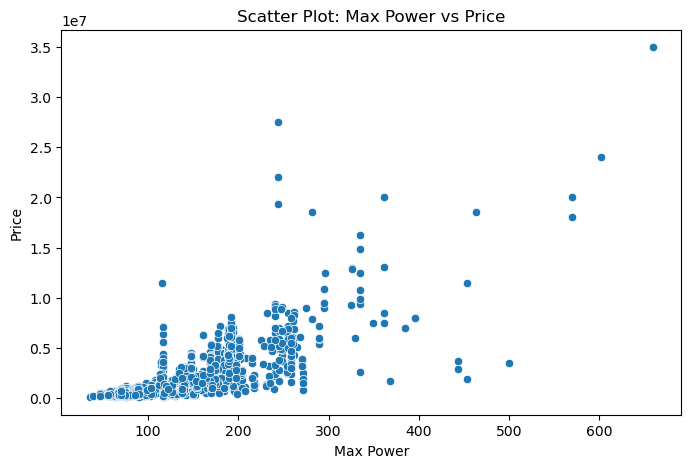

In [39]:
# Scatter plots to observe relationships
for feature in numerical_features:
    if feature != 'Price':
        plt.figure(figsize=(8, 5))
        sns.scatterplot(x=car_data[feature], y=car_data['Price'])
        plt.title(f"Scatter Plot: {feature} vs Price")
        plt.xlabel(feature)
        plt.ylabel('Price')
        plt.show()


In [43]:
# Define a function to cap outliers
def cap_outliers(data, column, lower_percentile=1, upper_percentile=99):
    lower_limit = data[column].quantile(lower_percentile / 100)
    upper_limit = data[column].quantile(upper_percentile / 100)
    data[column] = data[column].clip(lower=lower_limit, upper=upper_limit)
    print(f"{column}: Outliers capped between {lower_limit} and {upper_limit}")

# Apply outlier capping for the selected columns
outlier_columns = ['Price', 'Kilometer', 'Engine', 'Max Power']
for col in outlier_columns:
    cap_outliers(car_data, col)



Price: Outliers capped between 160000.0 and 10817640.000000004
Kilometer: Outliers capped between 2459.7808000000005 and 145882.0000000003
Engine: Outliers capped between 796.0 and 3198.0
Max Power: Outliers capped between 47.0 and 335.0


/var/folders/55/_l0llkgn531_3pht2rp20t4m0000gn/T/ipykernel_91247/125857663.py:5: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[column] = data[column].clip(lower=lower_limit, upper=upper_limit)


In [51]:
import pandas as pd
import numpy as np

# Add new derived features
car_data['Mileage Intensity'] = car_data['Kilometer'] / (car_data['Age'] + 1)  # Avoid division by zero
car_data['Price per CC'] = car_data['Price'] / car_data['Engine']

# Replace infinities or NaNs caused by division
car_data['Mileage Intensity'] = car_data['Mileage Intensity'].replace([np.inf, -np.inf], np.nan)
car_data['Price per CC'] = car_data['Price per CC'].replace([np.inf, -np.inf], np.nan)

# Fill NaNs in the new features with their median
car_data['Mileage Intensity'] = car_data['Mileage Intensity'].fillna(car_data['Mileage Intensity'].median())
car_data['Price per CC'] = car_data['Price per CC'].fillna(car_data['Price per CC'].median())

# Verify the added columns
print("First 5 rows of the new features:")
print(car_data[['Mileage Intensity', 'Price per CC']].head())

# Check for missing values in the new columns
print("\nMissing values in new features:")
print(car_data[['Mileage Intensity', 'Price per CC']].isnull().sum())

# Summary statistics of the new features
print("\nSummary statistics of the new features:")
print(car_data[['Mileage Intensity', 'Price per CC']].describe())




First 5 rows of the new features:
   Mileage Intensity  Price per CC
0       10893.750000    421.535893
1        6818.181818    360.576923
2        4785.714286    183.792815
3        6250.000000    667.502089
4        9857.142857    814.876724

Missing values in new features:
Mileage Intensity    0
Price per CC         0
dtype: int64

Summary statistics of the new features:
       Mileage Intensity  Price per CC
count        2059.000000   2059.000000
mean         6113.483258    856.150670
std          3134.493342    798.246743
min           409.963467     64.153970
25%          3901.888889    375.939850
50%          5750.000000    564.295486
75%          7834.766667   1001.920690
max         20840.285714   5441.468813


In [61]:
# Log-transform skewed features
log_transform_columns = ['Price', 'Kilometer', 'Engine', 'Max Power']
for col in log_transform_columns:
    car_data[f'{col}_log'] = np.log1p(car_data[col])  # Log transformation (log1p handles zero safely)


In [63]:
from sklearn.preprocessing import MinMaxScaler

# Select numerical columns for scaling
numerical_cols = car_data.select_dtypes(include=['float64', 'int64']).columns

# Apply Min-Max scaling
scaler = MinMaxScaler()
car_data[numerical_cols] = scaler.fit_transform(car_data[numerical_cols])

print("Scaling applied to numerical features.")


Scaling applied to numerical features.


In [59]:
# Save the cleaned and transformed dataset
cleaned_file_path = 'processed_used_vehicles.csv'
car_data.to_csv(cleaned_file_path, index=False)
print(f"Processed dataset saved to {cleaned_file_path}")


Processed dataset saved to processed_used_vehicles.csv
